# 線性模型（Linear & Logistic Regression）

## 實作練習

### **Part 1 線性迴歸實作：同步機勵磁電流預測**

同步機：一種交流電動機  
勵磁電流：同步機中的勵磁系統產生的電流，會影響機器的效率和穩定性  
資料集連結：https://archive.ics.uci.edu/dataset/607/synchronous+machine+data+set  

總共有557筆資料，每筆資料包含同步機在不同情境下的負載電流、功率、功率誤差、激磁電流變化等參數

輸入特徵：
- Iy：負載電流（V）
- PF：功率（W）
- e：功率誤差
- dIf：同步機激磁電流變化

輸出：
- If：同步機勵磁電流

我們的目標是透過建立一個預測模型預測同步機的勵磁電流，從而調整其他項目並提高效率、減少能源浪費  

In [6]:
#1 載入資料集
import pandas as pd

# 載入資料集，指定分隔符為分號，小數點為逗號
df_data = pd.read_csv('./Dataset/synchronous_machine.csv', sep=';', decimal=',')

# 提取輸入特徵、輸出變數
X = df_data[['Iy', 'PF', 'e', 'dIf']]
y = df_data['If'].values

### 觀察資料分布

先觀察資料的統計分布，決定要進行哪些前置動作

,Iy,PF,e,dIf,If
count,557.000000,557.000000,557.000000,557.000000,557.000000
mean,4.499820,0.825296,0.174704,0.350659,1.530659
std,0.896024,0.103925,0.103925,0.180566,0.180566
min,3.000000,0.650000,0.000000,0.037000,1.217000
25%,3.700000,0.740000,0.080000,0.189000,1.369000
50%,4.500000,0.820000,0.180000,0.345000,1.525000
75%,5.300000,0.920000,0.260000,0.486000,1.666000
max,6.000000,1.000000,0.350000,0.769000,1.949000


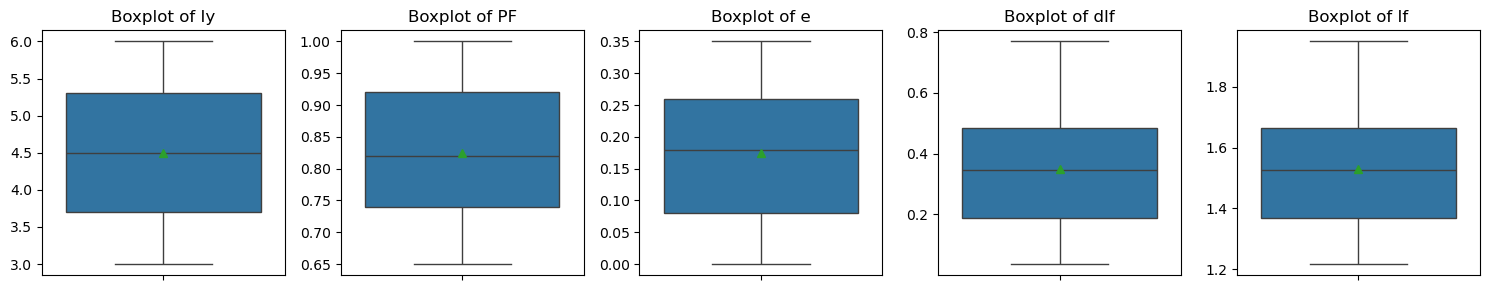

In [8]:
#2 觀察資料統計分布
import matplotlib.pyplot as plt
import seaborn as sns

# 定義特徵名稱串列
x_feature_names = ['Iy', 'PF', 'e', 'dIf', 'If']

# 繪製統計表格
display(df_data.describe())

# 繪製箱型圖
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))
for i, feature in enumerate(x_feature_names):
    col = i % 5
    sns.boxplot(y=df_data[feature], ax=axes[col], showmeans=True)
    axes[col].set_title(f'Boxplot of {feature}')
    axes[col].set_ylabel('')

plt.tight_layout()
plt.show()

觀察表格和圖形可以發現：

- 負載電流（Iy）的極值範圍最大，其他特徵數值範圍都很小  
- 每個特徵的分布都很均勻，沒有出現離群值  
- 由於數據分布不均，要將資料進行標準化再建立模型

### 分割資料集

先分割資料集再進行資料前處理，分成訓練集60%、驗證集20%、測試集20%

In [16]:
#3 分割資料
from sklearn.model_selection import train_test_split

# 先分出測試集的20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 再分出驗證集的20%，剩下的就是訓練集集
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print('Train set shape:', X_train.shape)
print('Validation set shape:', X_val.shape)
print('Test set shape:', X_test.shape)

Train set shape: (333, 4)
Validation set shape: (112, 4)
Test set shape: (112, 4)


### 資料前處理

接著進行資料前處理，將資料標準化

In [19]:
#4 特徵標準化
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

### 建立與訓練模型

接著就可以建立並訓練線性迴歸模型

In [32]:
#5 建立並訓練Linear Regression模型
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### 套用模型並觀察結果

用模型進行預測並觀察各個資料集的R2 score, MSE

In [43]:
#6 評估模型的訓練結果
from sklearn.metrics import mean_squared_error

# 訓練集
y_train_pred = linear_model.predict(X_train)
print("Train set")
print("R2 Score:", linear_model.score(X_train, y_train))
print("MSE     :", mean_squared_error(y_train, y_train_pred))

# 驗證集
print("\nValidation set")
y_val_pred = linear_model.predict(X_val)
print("R2 Score:", linear_model.score(X_val, y_val))
print("MSE     :", mean_squared_error(y_val, y_val_pred))

# 測試集極
print("\nTest set")
y_test_pred = linear_model.predict(X_test)
print("R2 Score:", linear_model.score(X_test, y_test))
print("MSE     :", mean_squared_error(y_test, y_test_pred))

Train set
R2 Score: 1.0
MSE     : 6.203692178821395e-32

Validation set
R2 Score: 1.0
MSE     : 6.603188380756237e-32

Test set
R2 Score: 1.0
MSE     : 6.206997077910863e-32


（不愧是玩具資料集，看到有點傻眼）

### 測試集結果視覺化

既然R2 Score = 1，那我們將結果繪製出來應該會看到一條完美的直線

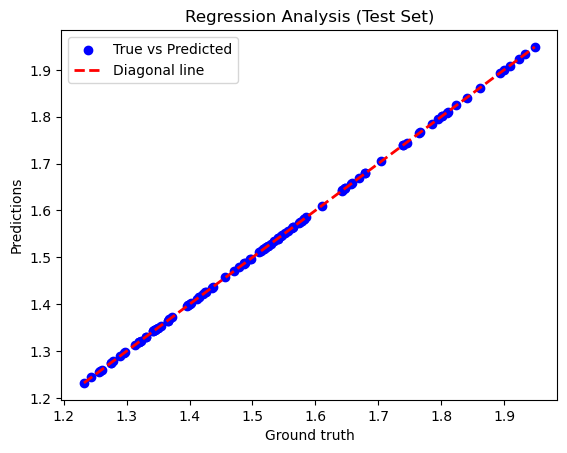

In [50]:
#7 測試集結果視覺化
# 繪製散布圖
plt.scatter(y_test, y_test_pred, color='blue', label='True vs Predicted')

# 繪製擬合線
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label='Diagonal line')

plt.title('Regression Analysis (Test Set)')
plt.xlabel('Ground truth')
plt.ylabel('Predictions')
plt.legend()
plt.show()

結果可以發現紅線（預測線）幾乎和藍點（實際資料點）重合，表示擬合效果非常好（好到好無聊）  

### 分析迴歸係數

接著可以進一步分析迴歸係數，瞭解各個自變數改變對應變數會造成的影響

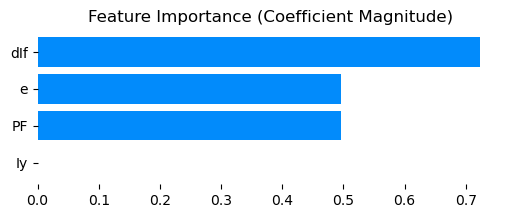

In [56]:
#8 迴歸係數分析
# 建立空的DataFrame 存入係數並重新排列
df_coef = pd.DataFrame()
df_coef['coef'] = np.abs(linear_model.coef_)
df_coef['feature'] = ['Iy', 'PF', 'e', 'dIf']
df_sorted = df_coef.sort_values('coef', ascending=True)

# 繪製結果 查看各個自變數的係數大小
plt.figure(figsize=(6, 2))
plt.barh(df_sorted['feature'], df_sorted['coef'], color='#028bfb')
plt.box(False)
plt.title("Feature Importance (Coefficient Magnitude)")
plt.show()

結果可以發現：
- dIf（同步機激磁電流變化）的係數最大，代表它在預測同步機勵磁電流的模型中影響力最大，變動激磁電流時勵磁電流會有明顯的變化

### **Part 2 邏輯迴歸實作：鳶尾花朵分類**

老朋友又來了，這次的目標是用邏輯迴歸把三種不同的花區分開來  
資料集連結：https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html  

共有150比資料，已標記了山鳶尾、變色鳶尾、維吉尼亞鳶尾三個品種  

輸入特徵：
- SepalLengthCm：花萼長度（cm）
- SepalWidthCm：花萼寬度（cm）
- PetalLengthCm：花瓣長度（cm）
- PetalWidthCm：花瓣寬度（cm）  

輸出：
- setosa：山鳶尾
- versicolor：變色鳶尾
- virginica：維吉尼亞鳶尾

In [63]:
#1 載入資料集
from sklearn.datasets import load_iris

iris = load_iris()

# 設定輸入特徵、輸出變數
X = iris.data
y = iris.target

### 資料視覺化

養成資料視覺化的習慣

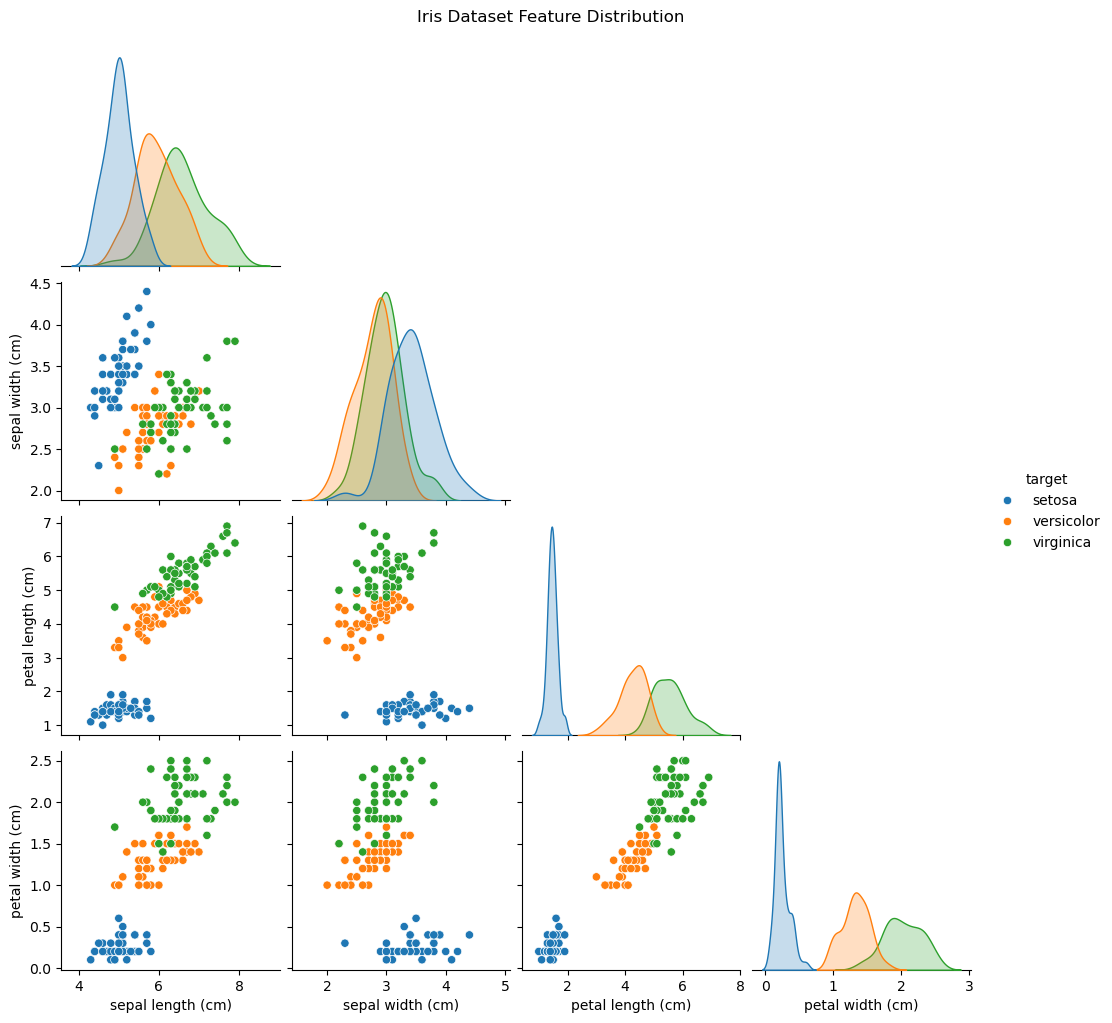

In [68]:
#2 資料視覺化
# 將資料轉成DataFrame，加上欄位名稱與標籤
df_iris = pd.DataFrame(X, columns=iris.feature_names)
df_iris['target'] = y
df_iris['target'] = df_iris['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 繪製KDE
sns.pairplot(df_iris, hue='target', corner=True, diag_kind='kde')
plt.suptitle("Iris Dataset Feature Distribution", y=1.02)
plt.show()

結果可以發現：
- setosa的資料非常集中，和其他類別有明顯分離
- virginica和versicolor在sepal width和sepal length上分布範圍相似
- petal length和petal width呈現強正相關

整體資料分布沒有問題，只需標準化就好

### 分割資料集

同樣在資料前處理前先分割資料集，分成訓練60%、驗證20%、測試20%

In [74]:
#3 分割資料集
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

X_train shape: (90, 4)
X_val shape: (30, 4)
X_test shape: (30, 4)


### 資料前處理

由於各個特徵的數值分布仍然有差異，所以還是要進行標準化

In [79]:
#4 特徵標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

### 建立與訓練模型

再來就建立邏輯迴歸模型並訓練模型

In [82]:
#5 建立並訓練Logistic Regression模型
from sklearn.linear_model import LogisticRegression

# 建立模型
logistic_model = LogisticRegression(solver='liblinear', random_state=42)

# 訓練模型
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

### 預測並評估準確度

將模型套用到驗證、測試集上，並觀察準確度

In [85]:
#6 評估模型的訓練結果
# 用模型預測
y_train_pred = logistic_model.predict(X_train)
y_val_pred = logistic_model.predict(X_val)
y_test_pred = logistic_model.predict(X_test)

# 觀察準確度
print('訓練集準確度:', logistic_model.score(X_train, y_train))
print('驗證集準確度:', logistic_model.score(X_val, y_val))
print('測試集準確度:', logistic_model.score(X_test, y_test))

訓練集準確度: 0.9
驗證集準確度: 0.8333333333333334
測試集準確度: 0.9333333333333333


驗證集的準確度似乎特別低，繪製混淆矩陣看看模型的判斷情形

### 查看混淆矩陣

繪製模型的混淆矩陣查看分類狀況

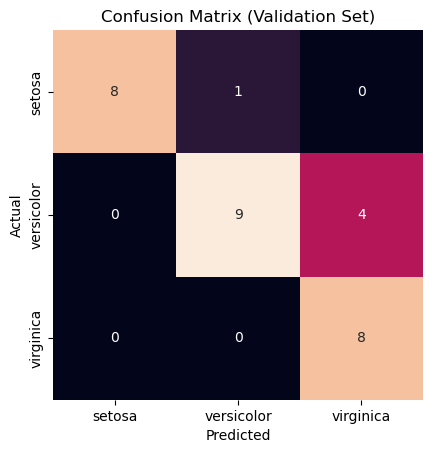

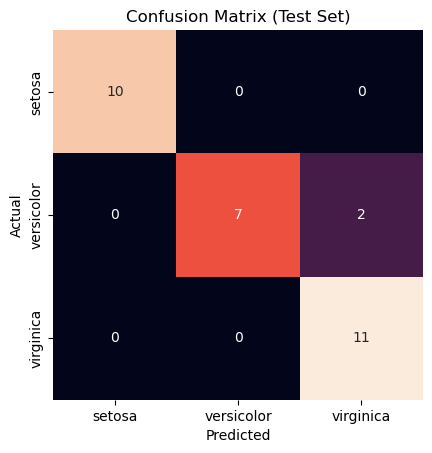

In [102]:
#7 查看混淆矩陣
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(actual, pred, labels):
    # 生成混淆矩陣
    matrix = pd.crosstab(actual, pred, rownames=['Actual'], colnames=['Predicted'])
    
    # 將混淆矩陣用熱圖繪製出來
    sns.heatmap(matrix, xticklabels=labels, yticklabels=labels, square=True, annot=True, cbar=False)

# 驗證集
y_label_names = ['setosa', 'versicolor', 'virginica']
plot_confusion_matrix(y_val, y_val_pred, labels=y_label_names)
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# 測試集
plot_confusion_matrix(y_test, y_test_pred, labels=y_label_names)
plt.title("Confusion Matrix (Test Set)")
plt.show()

結果可以發現：
- Setosa和Virginica的預測正確率很高，所有樣本都正確分類；Versicolor最容易被錯誤分類
- 可以更深入研究Versicolor和Virginica的區分特徵或使用更多數據和特徵來提高模型的分辨能力（這就是Domain Knowledge的重要性了）
- 我的解釋：由於Versicolor的各項特徵的數值都在Setosa和Virginica的中間，所以最容易被搞錯